In [3]:
import numpy as np
import pickle
import nibabel as nib
import os

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import torch

from batchgeneratorsv2.transforms.nnunet.random_binary_operator import binary_dilation_torch
from skimage.morphology import ball, disk


In [4]:
npz_filepath = "/home/bryan/expr/mbas_nnUNet_results/Dataset101_MBAS/cascade_ground_truth/ground_truth_binary/MBAS_001.npz"

binary_mask_fpath = "/home/bryan/expr/mbas_nnUNet_results/Dataset104_MBAS/mbasTrainer__plans_2024_08_27__ResEncUNet_3d_lowres_for25_drop50_slim96/crossval_results_folds_0_1_2_3_4/postprocessed/MBAS_001.nii.gz"

In [5]:
npz = np.load(npz_filepath)

In [6]:
seg = npz["seg"]

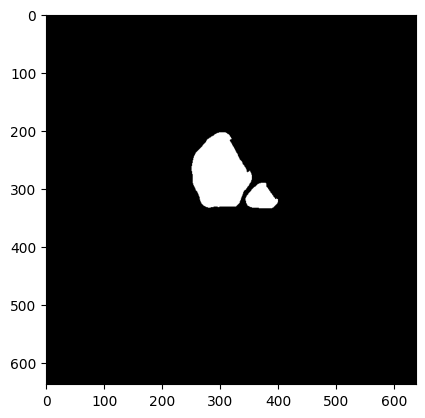

In [7]:
plt.imshow(seg[10], cmap="gray")

In [13]:
binary_mask = (
    nib.load(binary_mask_fpath).get_fdata().astype(np.uint8)
)
# e.g. shape (576,576,44)
binary_mask = binary_mask.transpose([2, 1, 0])

In [14]:
binary_mask.shape

(44, 640, 640)

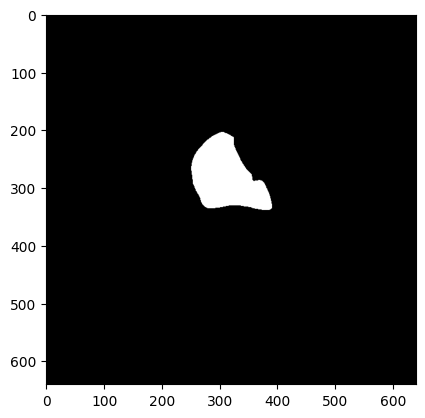

In [15]:
plt.imshow(binary_mask[10], cmap="gray")

In [12]:
seg.shape

(44, 638, 638)

In [7]:
seg.shape

(44, 638, 638)

In [8]:
seg_torch = torch.from_numpy(seg)

In [15]:
ball3d = ball(1, dtype=bool)

In [16]:
seg_dil = binary_dilation_torch(seg_torch, torch.from_numpy(ball3d))

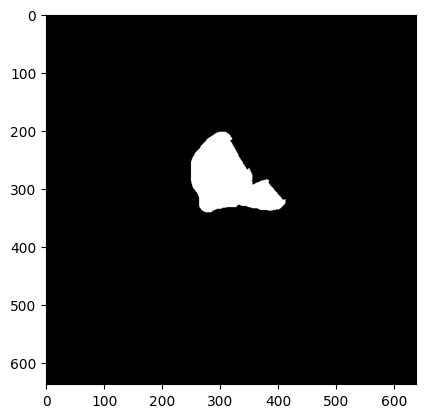

In [17]:
plt.imshow(seg_dil.numpy()[10], cmap="gray")

In [29]:
def print_tensor(tensor, name, force_unique=False):
    print(name, tensor.shape, tensor.dtype)
    if tensor.dtype == np.float32:
        print(f"\trange: [{tensor.min()}, {tensor.max()}]")
    elif tensor.dtype in (np.int8, np.uint8) or force_unique:
        print(f"\t{np.unique(tensor.flatten(), return_counts=True)}")

In [33]:
print_tensor(seg_torch, "seg", force_unique=True)

seg torch.Size([44, 638, 638]) torch.int8
	(array([0, 1], dtype=int8), array([17612656,   297280]))


In [36]:
print_tensor(seg_dil, "seg_dil", force_unique=True)

seg_dil torch.Size([44, 638, 638]) torch.bool
	(array([False,  True]), array([17602477,   307459]))


In [48]:
seg_torch.shape

torch.Size([44, 638, 638])

In [49]:
seg_torch.ndim

3